In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataf = pd.read_csv("./accepted_2007_to_2018Q4.csv")

/var/folders/x7/8kqbx0vj2p5795wlv956gt200000gn/T/ipykernel_92100/3694811094.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  dataf = pd.read_csv("./accepted_2007_to_2018Q4.csv")


In [3]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [4]:
for i in dataf.columns:
    print(i)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
to

In [5]:
df = dataf[['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_title','emp_length',
                        'home_ownership','annual_inc','verification_status','issue_d','loan_status','purpose',
                        'title','dti','earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util',
                        'total_acc','initial_list_status','application_type','mort_acc','pub_rec_bankruptcies']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   term                  object 
 2   int_rate              float64
 3   installment           float64
 4   grade                 object 
 5   sub_grade             object 
 6   emp_title             object 
 7   emp_length            object 
 8   home_ownership        object 
 9   annual_inc            float64
 10  verification_status   object 
 11  issue_d               object 
 12  loan_status           object 
 13  purpose               object 
 14  title                 object 
 15  dti                   float64
 16  earliest_cr_line      object 
 17  open_acc              float64
 18  pub_rec               float64
 19  revol_bal             float64
 20  revol_util            float64
 21  total_acc             float64
 22  initial_list_status   object 
 23  applica

In [7]:
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [8]:
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

In [9]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [10]:
# 查看数据

<Axes: xlabel='loan_status', ylabel='count'>

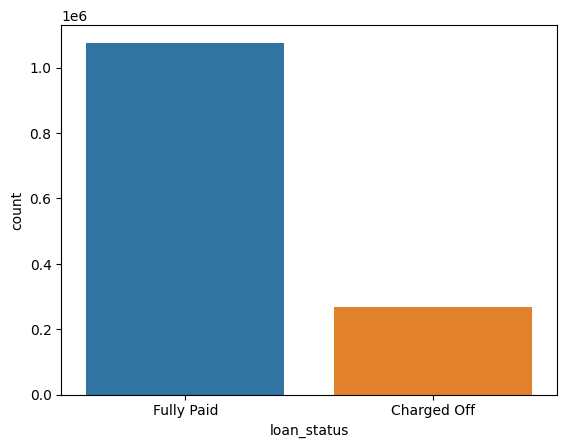

In [11]:
sns.countplot(x='loan_status',data=df)

/var/folders/x7/8kqbx0vj2p5795wlv956gt200000gn/T/ipykernel_92100/2022642379.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'],kde=False,bins=40)


(0.0, 45000.0)

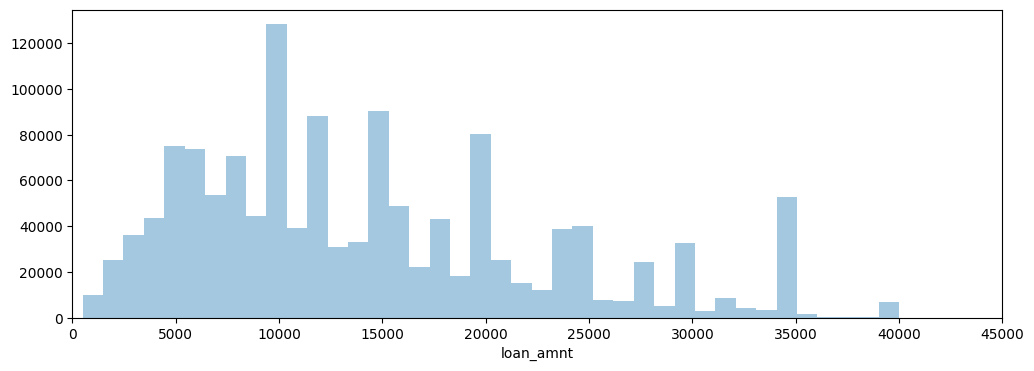

In [12]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

/var/folders/x7/8kqbx0vj2p5795wlv956gt200000gn/T/ipykernel_92100/2893251343.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


(10.0, 0.0)

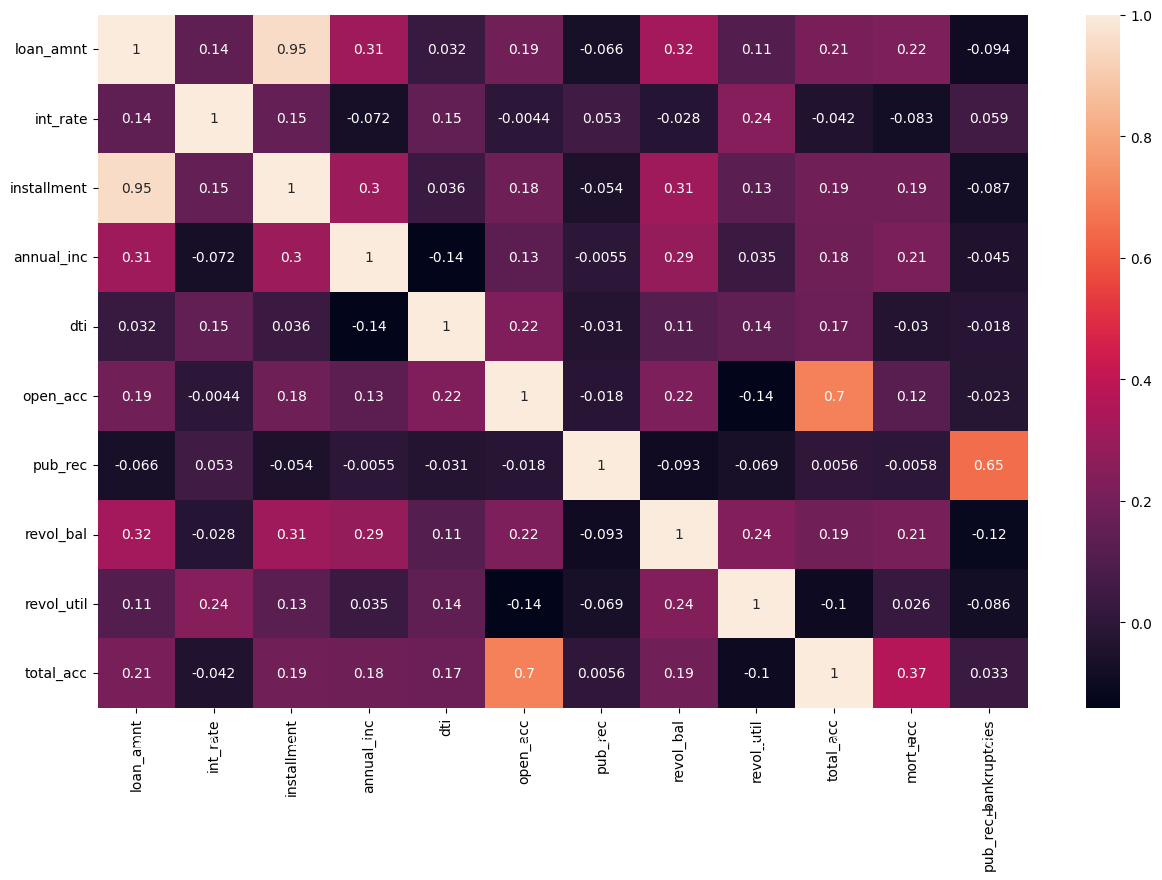

In [13]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)
plt.ylim(10, 0)

<Axes: xlabel='installment', ylabel='loan_amnt'>

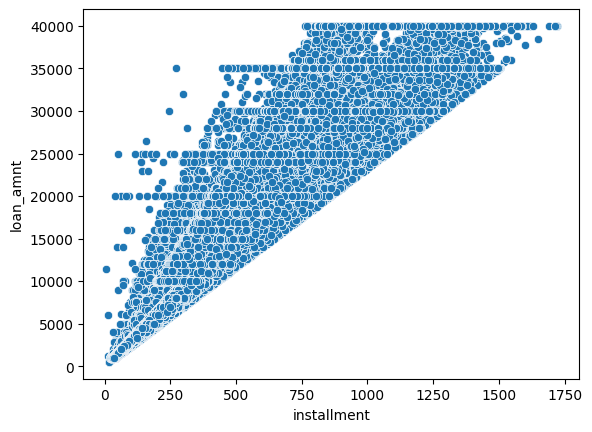

In [14]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

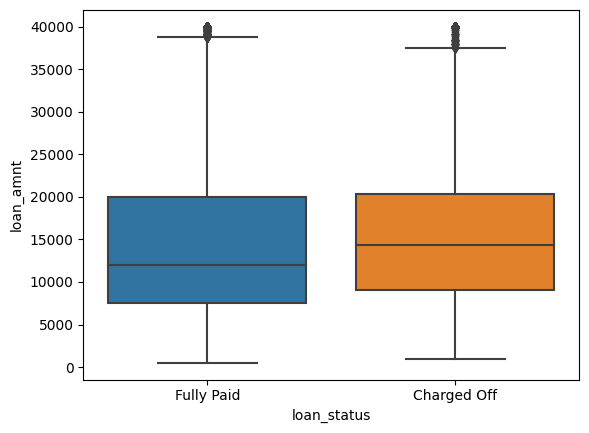

In [15]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [16]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,15565.055444,8814.560077,900.0,9000.0,14350.0,20400.0,40000.0
Fully Paid,1076751.0,14134.369808,8669.028973,500.0,7500.0,12000.0,20000.0,40000.0


In [17]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [18]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

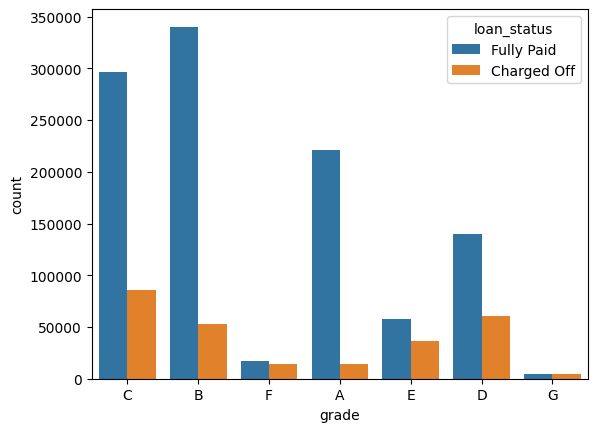

In [19]:
sns.countplot(x='grade',data=df,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

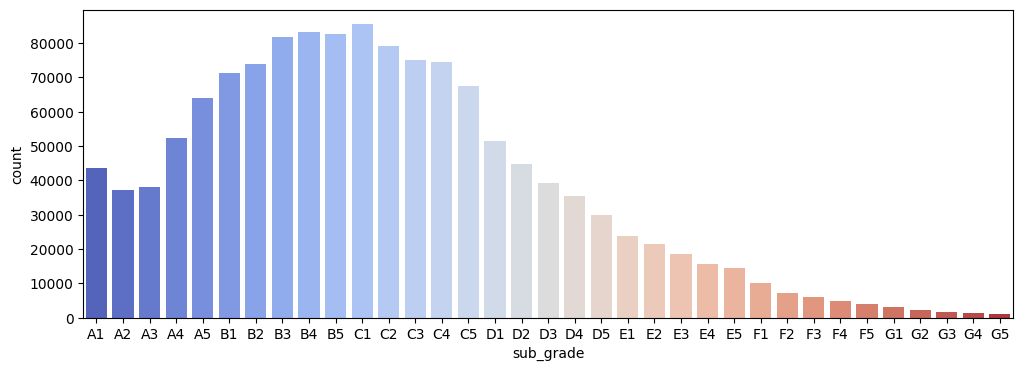

In [20]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

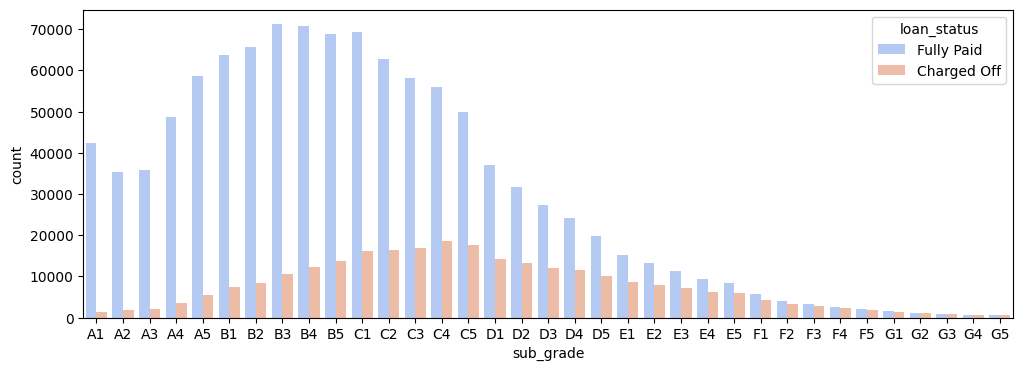

In [21]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

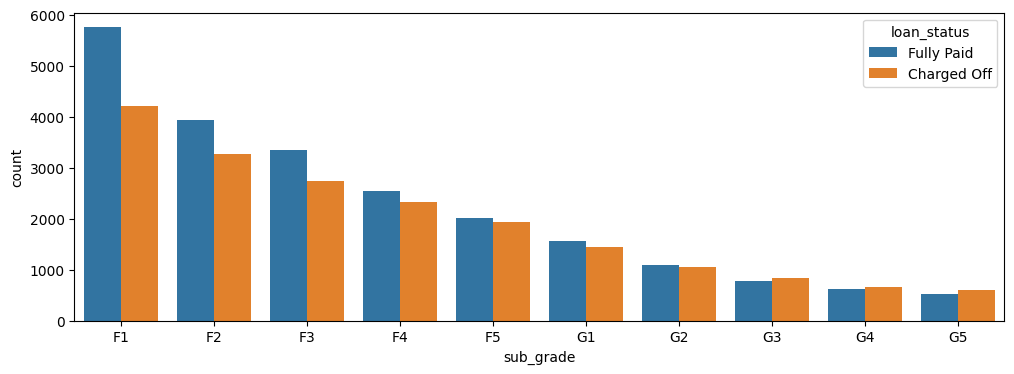

In [22]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [23]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [24]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
4,1,Fully Paid
5,1,Fully Paid
...,...,...
2260688,1,Fully Paid
2260690,1,Fully Paid
2260691,0,Charged Off
2260692,1,Fully Paid


/var/folders/x7/8kqbx0vj2p5795wlv956gt200000gn/T/ipykernel_92100/660239616.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')


<Axes: >

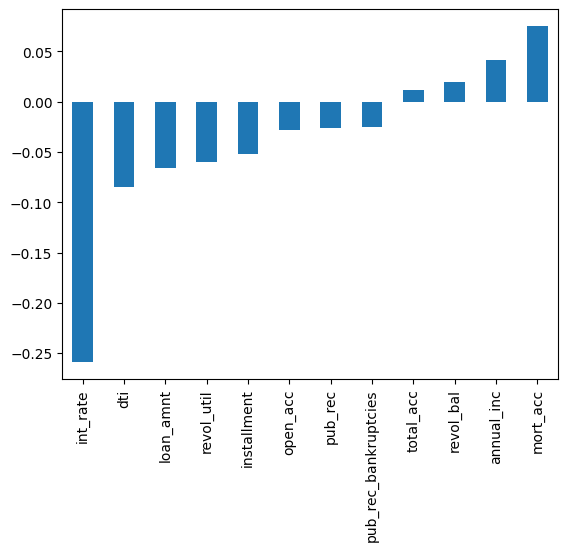

In [25]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [26]:
df = df.drop('loan_status',axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1345310 non-null  float64
 1   term                  1345310 non-null  object 
 2   int_rate              1345310 non-null  float64
 3   installment           1345310 non-null  float64
 4   grade                 1345310 non-null  object 
 5   sub_grade             1345310 non-null  object 
 6   emp_title             1259525 non-null  object 
 7   emp_length            1266799 non-null  object 
 8   home_ownership        1345310 non-null  object 
 9   annual_inc            1345310 non-null  float64
 10  verification_status   1345310 non-null  object 
 11  issue_d               1345310 non-null  object 
 12  purpose               1345310 non-null  object 
 13  title                 1328651 non-null  object 
 14  dti                   1344936 non-

In [28]:
# 对数据进行处理

In [29]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_repaid
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,...,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0,1
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0,1
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,...,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0,1
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,...,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0,1
5,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,...,5.0,0.0,8822.0,68.4,6.0,w,Individual,0.0,0.0,1


In [30]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               85785
emp_length              78511
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                   16659
dti                       374
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                857
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                47281
pub_rec_bankruptcies      697
loan_repaid                 0
dtype: int64

In [31]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.376597
emp_length              5.835904
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   1.238302
dti                     0.027800
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.063703
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                3.514506
pub_rec_bankruptcies    0.051810
loan_repaid             0.000000
dtype: float64

In [32]:
df['emp_title'].nunique()

378353

In [33]:
df['emp_title'].value_counts()

Teacher                          21268
Manager                          19470
Owner                            10302
Registered Nurse                  8774
RN                                8522
                                 ...  
CSR. SR                              1
Auto body prepper                    1
Software engineer supervisor         1
Ins Adjuster                         1
Exec Dir Internal Audit              1
Name: emp_title, Length: 378353, dtype: int64

In [34]:
df = df.drop('emp_title',axis=1) # title has little to do with whether the loan will be repaid

In [35]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [36]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

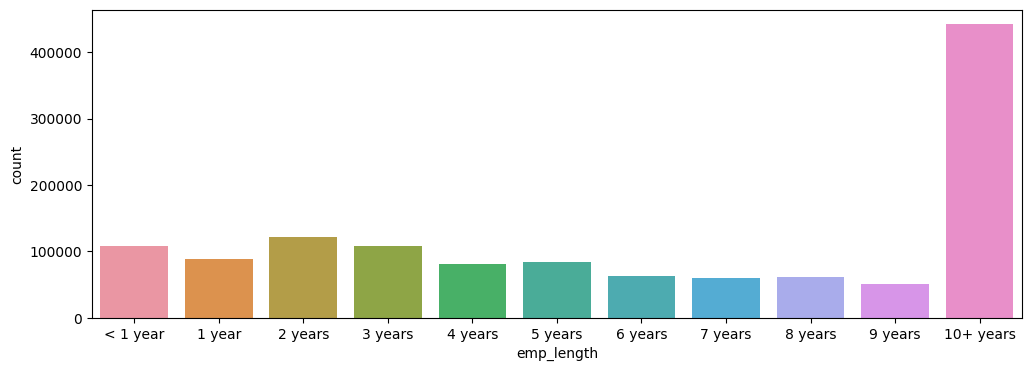

In [37]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

<Axes: xlabel='emp_length', ylabel='count'>

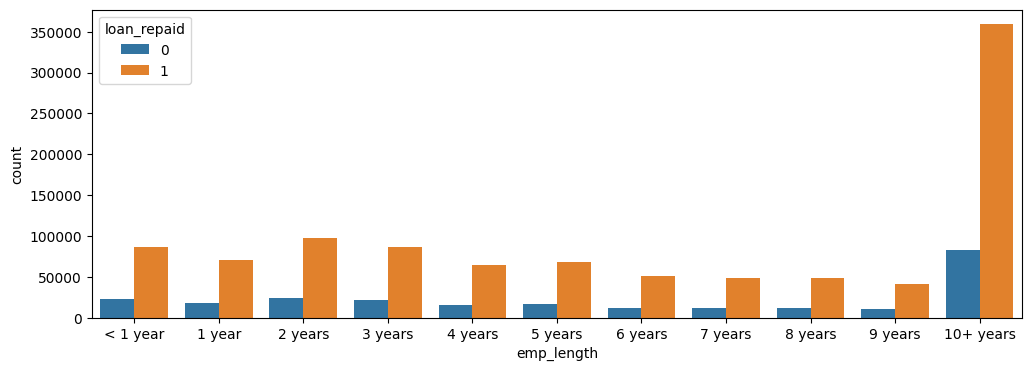

In [38]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_repaid')

In [39]:
emp_co = df[df['loan_repaid']==0].groupby("emp_length").count()['loan_repaid']
emp_fp = df[df['loan_repaid']==1].groupby("emp_length").count()['loan_repaid']

In [40]:
emp_len = emp_co/emp_fp
emp_len

emp_length
1 year       0.258877
10+ years    0.231265
2 years      0.246996
3 years      0.249515
4 years      0.245917
5 years      0.243796
6 years      0.239954
7 years      0.242063
8 years      0.248966
9 years      0.248456
< 1 year     0.258294
Name: loan_repaid, dtype: float64

<Axes: xlabel='emp_length'>

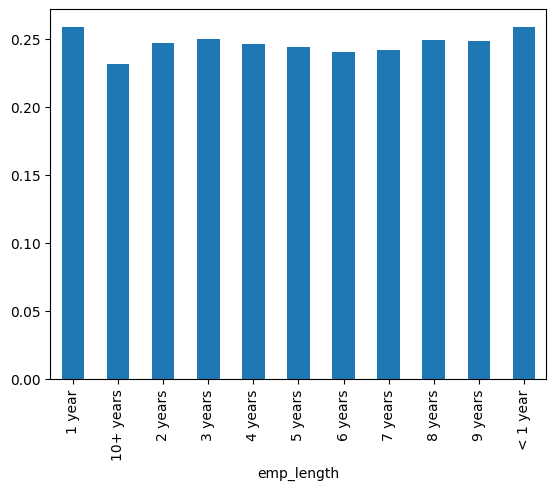

In [41]:
emp_len.plot(kind='bar')

In [42]:
df = df.drop('emp_length',axis=1) # It has nothing to do with whether the loan will be repaid

In [43]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                   16659
dti                       374
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                857
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                47281
pub_rec_bankruptcies      697
loan_repaid                 0
dtype: int64

In [44]:
df['title'].head(10)

0          Debt consolidation
1                    Business
2                         NaN
4              Major purchase
5          Debt consolidation
6          Debt consolidation
7              Major purchase
8     Credit card refinancing
9     Credit card refinancing
12                        NaN
Name: title, dtype: object

In [45]:
df = df.drop('title',axis=1)

In [46]:
df['mort_acc'].value_counts()

0.0     523837
1.0     226135
2.0     188941
3.0     139381
4.0      94920
5.0      57632
6.0      32539
7.0      16850
8.0       8378
9.0       4285
10.0      2197
11.0      1206
12.0       640
13.0       356
14.0       244
15.0       132
16.0        93
17.0        61
18.0        48
19.0        29
20.0        25
24.0        16
21.0        14
22.0        14
23.0        10
25.0         9
27.0         8
26.0         6
29.0         4
28.0         4
34.0         3
30.0         2
32.0         2
37.0         2
31.0         2
47.0         1
35.0         1
51.0         1
36.0         1
Name: mort_acc, dtype: int64

In [47]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


/var/folders/x7/8kqbx0vj2p5795wlv956gt200000gn/T/ipykernel_92100/3893325951.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values()


int_rate               -0.083276
dti                    -0.029558
pub_rec                -0.005783
pub_rec_bankruptcies    0.006717
revol_util              0.026424
loan_repaid             0.075294
open_acc                0.121218
installment             0.191559
revol_bal               0.205459
annual_inc              0.214305
loan_amnt               0.224566
total_acc               0.367947
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [48]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


/var/folders/x7/8kqbx0vj2p5795wlv956gt200000gn/T/ipykernel_92100/169858596.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('total_acc').mean()['mort_acc']


total_acc
2.0      0.000000
3.0      0.036904
4.0      0.073641
5.0      0.116010
6.0      0.172382
           ...   
156.0    1.000000
162.0    6.000000
169.0    2.000000
173.0    2.000000
176.0    2.000000
Name: mort_acc, Length: 142, dtype: float64

In [49]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

/var/folders/x7/8kqbx0vj2p5795wlv956gt200000gn/T/ipykernel_92100/1700171341.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = df.groupby('total_acc').mean()['mort_acc']


In [50]:
total_acc_avg[2.0]

0.0

In [51]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accept the total_acc and mort_acc values for each row

    Checks if mort_acc is NaN, and if so, it returns the avg mort_acc value
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [52]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [53]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
dti                     374
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              857
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    697
loan_repaid               0
dtype: int64

In [54]:
df = df.dropna()

In [55]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
loan_repaid             0
dtype: int64

In [56]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type'],
      dtype='object')

In [57]:
df['term'].value_counts()

 36 months    1019128
 60 months     324255
Name: term, dtype: int64

In [58]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [59]:
df['term']

0          36
1          36
2          60
4          60
5          36
           ..
2260688    60
2260690    60
2260691    60
2260692    60
2260697    60
Name: term, Length: 1343383, dtype: int64

In [60]:
df = df.drop('grade', axis = 1) # Similar to subgrade, so delete grade

In [61]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [62]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [63]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [64]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,3600.0,36,13.99,123.03,MORTGAGE,55000.0,Not Verified,Dec-2015,debt_consolidation,5.91,...,0,0,0,0,0,0,0,0,0,0
1,24700.0,36,11.99,820.28,MORTGAGE,65000.0,Not Verified,Dec-2015,small_business,16.06,...,0,0,0,0,0,0,0,0,0,0
2,20000.0,60,10.78,432.66,MORTGAGE,63000.0,Not Verified,Dec-2015,home_improvement,10.78,...,0,0,0,0,0,0,0,0,0,0
4,10400.0,60,22.45,289.91,MORTGAGE,104433.0,Source Verified,Dec-2015,major_purchase,25.37,...,1,0,0,0,0,0,0,0,0,0
5,11950.0,36,13.44,405.18,RENT,34000.0,Source Verified,Dec-2015,debt_consolidation,10.20,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type'],
      dtype='object')

In [66]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first = True)

In [67]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

In [68]:
df = pd.concat([df,dummies],axis=1)
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'earliest_cr_line'], dtype='object')

In [69]:
df['home_ownership'].value_counts()

MORTGAGE    664655
RENT        533640
OWN         144616
ANY            285
OTHER          142
NONE            45
Name: home_ownership, dtype: int64

In [70]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [71]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

In [72]:
dummies

,OTHER,OWN,RENT
0,0,0,0
1,0,0,0
2,0,0,0
4,0,0,0
5,0,0,1
...,...,...,...
2260688,0,1,0
2260690,0,0,0
2260691,0,0,0
2260692,0,0,1


In [73]:
df['home_ownership'].value_counts()

MORTGAGE    664655
RENT        533640
OWN         144616
OTHER          472
Name: home_ownership, dtype: int64

In [74]:
df = df.drop(['home_ownership'],axis=1)

In [75]:
df = pd.concat([df,dummies],axis=1)

In [76]:
df.head(2)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_Joint App',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

In [77]:
df = df.drop(['issue_d'],axis=1)

In [78]:
df['earliest_cr_line']

0          Aug-2003
1          Dec-1999
2          Aug-2000
4          Jun-1998
5          Oct-1987
             ...   
2260688    Jul-2004
2260690    Mar-2002
2260691    Jun-2011
2260692    Aug-1997
2260697    Jul-1999
Name: earliest_cr_line, Length: 1343383, dtype: object

In [79]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [80]:
df = df.drop(['earliest_cr_line'],axis=1)

In [81]:
len(df.columns)

69

In [82]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_Joint App', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT',
       'earliest_cr_year'],
      dtype='object')

In [83]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,earliest_cr_year
0,3600.0,36,13.99,123.03,55000.0,5.91,7.0,0.0,2765.0,29.7,...,0,0,0,0,0,0,0,0,0,2003
1,24700.0,36,11.99,820.28,65000.0,16.06,22.0,0.0,21470.0,19.2,...,0,0,0,1,0,0,0,0,0,1999
2,20000.0,60,10.78,432.66,63000.0,10.78,6.0,0.0,7869.0,56.2,...,0,0,0,0,0,0,0,0,0,2000
4,10400.0,60,22.45,289.91,104433.0,25.37,12.0,0.0,21929.0,64.5,...,0,0,0,0,0,0,0,0,0,1998
5,11950.0,36,13.44,405.18,34000.0,10.20,5.0,0.0,8822.0,68.4,...,0,0,0,0,0,0,0,0,1,1987


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [85]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [86]:
X

array([[3.600e+03, 3.600e+01, 1.399e+01, ..., 0.000e+00, 0.000e+00,
        2.003e+03],
       [2.470e+04, 3.600e+01, 1.199e+01, ..., 0.000e+00, 0.000e+00,
        1.999e+03],
       [2.000e+04, 6.000e+01, 1.078e+01, ..., 0.000e+00, 0.000e+00,
        2.000e+03],
       ...,
       [3.200e+04, 6.000e+01, 1.449e+01, ..., 0.000e+00, 0.000e+00,
        2.011e+03],
       [1.600e+04, 6.000e+01, 1.279e+01, ..., 0.000e+00, 1.000e+00,
        1.997e+03],
       [2.400e+04, 6.000e+01, 1.449e+01, ..., 0.000e+00, 1.000e+00,
        1.999e+03]])

In [87]:
df.drop('loan_repaid',axis=1)

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,earliest_cr_year
0,3600.0,36,13.99,123.03,55000.0,5.91,7.0,0.0,2765.0,29.7,...,0,0,0,0,0,0,0,0,0,2003
1,24700.0,36,11.99,820.28,65000.0,16.06,22.0,0.0,21470.0,19.2,...,0,0,0,1,0,0,0,0,0,1999
2,20000.0,60,10.78,432.66,63000.0,10.78,6.0,0.0,7869.0,56.2,...,0,0,0,0,0,0,0,0,0,2000
4,10400.0,60,22.45,289.91,104433.0,25.37,12.0,0.0,21929.0,64.5,...,0,0,0,0,0,0,0,0,0,1998
5,11950.0,36,13.44,405.18,34000.0,10.20,5.0,0.0,8822.0,68.4,...,0,0,0,0,0,0,0,0,1,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,18000.0,60,9.49,377.95,130000.0,20.59,17.0,0.0,23833.0,34.0,...,0,0,0,0,0,0,0,1,0,2004
2260690,29400.0,60,13.99,683.94,180792.0,22.03,16.0,0.0,77480.0,85.2,...,0,0,0,0,0,0,0,0,0,2002
2260691,32000.0,60,14.49,752.74,157000.0,10.34,14.0,0.0,111598.0,27.4,...,0,0,0,0,0,0,0,0,0,2011
2260692,16000.0,60,12.79,362.34,150000.0,12.25,12.0,4.0,7700.0,55.0,...,0,0,0,0,0,0,0,0,1,1997


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [89]:
scaler = MinMaxScaler()

In [90]:
X_train = scaler.fit_transform(X_train)

In [91]:
X_test = scaler.transform(X_test)

In [92]:
X_train.shape

(1074706, 68)

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [94]:
print(tf.__version__)
print(tf.__path__)


2.4.1
['/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow_estimator/python/estimator/api/_v2', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorboard/summary/_tf', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow', '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/_api/v2']


In [95]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [96]:
model = Sequential()

# input layer
model.add(Dense(68,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(34, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(17, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

2023-11-07 20:23:48.753680: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-07 20:23:48.755071: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [97]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=256,
          validation_data=(X_test, y_test),verbose=1,
          callbacks=[early_stop] 
          )

2023-11-07 20:23:49.179939: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
4199/4199 [==============================] - 11s 2ms/step - loss: 0.4757 - val_loss: 0.4566
Epoch 2/100
4199/4199 [==============================] - 11s 3ms/step - loss: 0.4592 - val_loss: 0.4566
Epoch 3/100
4199/4199 [==============================] - 9s 2ms/step - loss: 0.4579 - val_loss: 0.4553
Epoch 4/100
4199/4199 [==============================] - 9s 2ms/step - loss: 0.4570 - val_loss: 0.4550
Epoch 5/100
4199/4199 [==============================] - 10s 2ms/step - loss: 0.4582 - val_loss: 0.4550
Epoch 6/100
4199/4199 [==============================] - 7s 2ms/step - loss: 0.4561 - val_loss: 0.4551
Epoch 7/100
4199/4199 [==============================] - 9s 2ms/step - loss: 0.4557 - val_loss: 0.4543
Epoch 8/100
4199/4199 [==============================] - 7s 2ms/step - loss: 0.4563 - val_loss: 0.4545
Epoch 9/100
4199/4199 [==============================] - 9s 2ms/step - loss: 0.4558 - val_loss: 0.4541
Epoch 10/100
4199/4199 [==============================] - 10s 2ms/step

In [98]:
from tensorflow.keras.models import load_model

In [99]:
model.save('model.h5') 

In [100]:
losses = pd.DataFrame(model.history.history)

<Axes: >

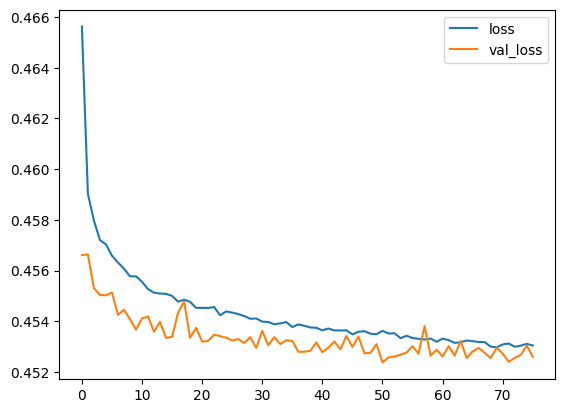

In [101]:
losses[['loss','val_loss']].plot()

In [102]:
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
predictions = model.predict_classes(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [104]:
X_test

array([[0.18987342, 0.        , 0.16277259, ..., 0.        , 1.        ,
        0.84507042],
       [0.11392405, 0.        , 0.10436137, ..., 0.        , 1.        ,
        0.85915493],
       [0.24050633, 1.        , 0.37694704, ..., 0.        , 0.        ,
        0.83098592],
       ...,
       [0.49367089, 0.        , 0.27180685, ..., 1.        , 0.        ,
        0.70422535],
       [0.79746835, 1.        , 0.45482866, ..., 0.        , 1.        ,
        0.67605634],
       [0.49367089, 1.        , 0.45482866, ..., 0.        , 1.        ,
        0.57746479]])

In [105]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.06      0.10     53693
           1       0.81      0.99      0.89    214984

    accuracy                           0.80    268677
   macro avg       0.69      0.52      0.50    268677
weighted avg       0.76      0.80      0.73    268677



In [106]:
confusion_matrix(y_test,predictions)

array([[  3048,  50645],
       [  2274, 212710]])

In [107]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt            15000.00
term                    36.00
int_rate                 7.99
installment            469.98
annual_inc          120000.00
                      ...    
purpose_wedding          0.00
OTHER                    0.00
OWN                      1.00
RENT                     0.00
earliest_cr_year      2003.00
Name: 1984666, Length: 68, dtype: float64

In [109]:
model.predict_classes(new_customer.values.reshape(1,68))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

In [110]:
df.iloc[random_ind]['loan_repaid']

1.0